 Garrigues Mathieu - Grandjean Valentin




# Rapport : Projet QAP

## Les instances Taixxa

Les instances de Taillard a sont des jeux de données de problèmes d'affectation quadratique.


Ces jeux de données ont été générés aléatoirement par Eric Taillard en 1991. 


Pour les tai15a, tai17a, tai20a, tai25a ont été résolu. C'est à dire que l'on connais la solution optimale.

Pour la définition d'un problème d'affectation quadratique nous avons besoin de 3 choses : 


>- Le nombre n d'emplacement et d'équipements à placer.
>
>
>- Une matrice représentant les poids (où flux) entre les différent équipement
>
>
>- Une matrice représentant les distances entre les emplacements
    
Dans les fichiers Taixxa on retrouve ces élément dans l'ordre précédemment énoncé.

## Les voisinages


### Définition des voisinages

Pour le problème d'affectation quadratique la solution que nous manipulons est un vecteur de taille n (nombre d'emplacement).

Donc nous avons choisi comme voisinage d'un vecteur quelquonque tout les autre vecteurs que l'on peut obtenir en faisant une permutation de deux éléments de ce vecteur.

Exemple : 

\\[ x =\begin{pmatrix}
1\\
2\\
3
\end{pmatrix}
\\]


###### alors


\\[ V(x) = \begin{pmatrix}
a_{1} & a_{2} & a_{3}
\end{pmatrix}
\\]


###### avec


\\[a_{1} = \begin{pmatrix}
2\\
1\\
3
\end{pmatrix}
\\]


\\[a_{2} = \begin{pmatrix}
3\\
2\\
1
\end{pmatrix}
\\]



\\[a_{3} = \begin{pmatrix}
1\\
3\\
2
\end{pmatrix}
\\]



### Justification des voisinages

Imports pour le bon fonctionnement du code

In [1]:
import time

import numpy as np
import random as rd
import pandas as pd
import sys
sys.path.insert(0, '../src/model/')
sys.path.insert(1, '../src/view/')
from Taixxa import Taixxa
from FitnessViewer import FitnessViewer
from FitnessComparator import FitnessComparator
from Permutation import Permutation 
from SimulatedAnnealing import SimulatedAnnealing
from TabuSearch import TabuSearch

## Les algorithmes



### Algorithme de recuit simulé

#### Principe et implémentation

Définition de quelques fonction qui vont définir comment va varier la température pour l'algorithme de recuit simulé : 


>\\( f_{\exp\sin} \\) est une fonction sinusoidale pondérée par une exponentielle négative (cf premier graph)
>
>
>\\( f_{\sin} \\) est une fonction sinusoidale simple (cf second graph)
>
>
>\\( f_{\exp} \\) est une fonction exponentielle négative simple (cf troisième graph)

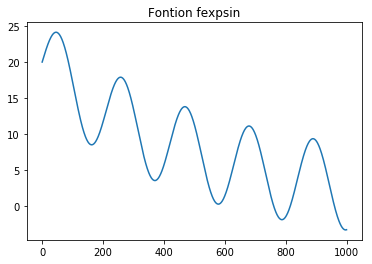

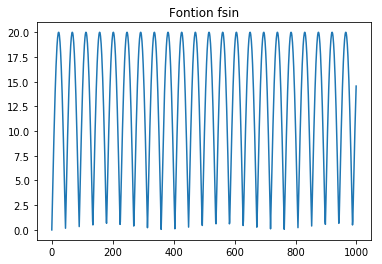

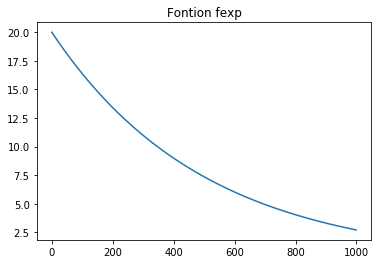

In [47]:
def fexpsin(t,i):
    return t*np.exp(-float(i)/500.0) + 0.3*t*(np.sin(float(i)*0.03))
def fsin(t,i):
    return t*np.abs(np.sin(float(i)*0.07))
def fexp(t,i):
    return t*np.exp(-float(i)/500.0)
t = 20
x = range(1000)
y1 = [fexpsin(t,a) for a in x]
y2 = [fsin(t,a) for a in x]
y3 = [fexp(t,a) for a in x]
viewer = FitnessViewer(np.array(y1))
viewer.plot('Fontion fexpsin')
viewer = FitnessViewer(np.array(y2))
viewer.plot('Fontion fsin')
viewer = FitnessViewer(np.array(y3))
viewer.plot('Fontion fexp')


#### Choix des paramètres

#### Résultats

#### Améliorations

### Méthode Tabou

#### Principe et implémentation

#### Choix des paramètres

#### Résultats

#### Améliorations

### Algorithme génétique

#### Principe et implémentation

#### Choix des paramètres

#### Résultats

#### Améliorations

## Comparaison des algorithmes

## Optimisation du code

[43, 37, 84, 86, 57, 47, 68, 74, 64, 21, 12, 20, 76, 67, 83, 26, 27, 77, 78, 25, 54, 22, 32, 7, 38, 45, 39, 11, 42, 55, 35, 97, 6, 34, 53, 88, 31, 93, 80, 95, 29, 99, 89, 5, 63, 30, 71, 18, 56, 0, 9, 94, 87, 4, 98, 17, 41, 59, 66, 65, 90, 8, 2, 15, 48, 23, 69, 13, 60, 24, 52, 44, 33, 61, 19, 96, 70, 82, 49, 79, 81, 10, 51, 50, 85, 28, 72, 40, 1, 75, 73, 3, 36, 91, 92, 16, 46, 62, 14, 58]
simulated annealing ....


<Figure size 432x288 with 0 Axes>

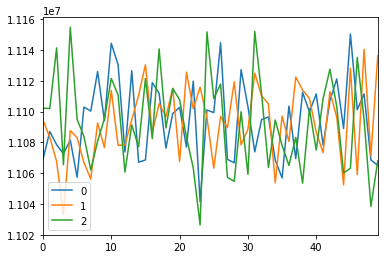

23955.033120155334


In [48]:
start_time = time.time()
# your code




data = Taixxa()
data.loadFile("tai100a.dat")

siman = SimulatedAnnealing(data)
tabuS = TabuSearch(data)

print("simulated annealing ....")

sols = []
sols2 = []
sols3 = []

for i in range(50):
    sol, fit1,temps = siman.solve(10+i, 0.9,500,11,fexpsin)
    sols.append(sol.computeCost(data))
    
for i in range(50):
    sol, fit1,temps = siman.solve(10+i, 0.9,500,11,fsin)
    sols2.append(sol.computeCost(data))
    
for i in range(50):
    sol, fit1,temps = siman.solve(10+i, 0.9,500,11,fexp)
    sols3.append(sol.computeCost(data))
    
lists = list([sols,sols2,sols3])
df = pd.concat([pd.Series(x) for x in lists], axis=1)
comp = FitnessComparator(df)
comp.plot()

data.saveHashMap()
elapsed_time = time.time() - start_time
print(elapsed_time)

In [32]:
data.saveHashMap()

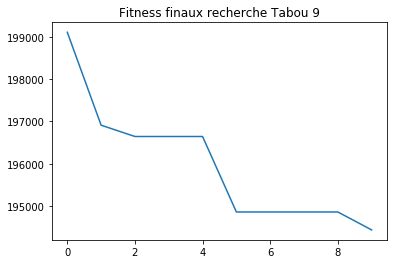

In [26]:
sols = []
machin = []
for i in range(10):
    for j in range(10):
        sol, fit = tabuS.solve(100,i)
        sols.append(sol.computeCost(data))
    machin.append(np.min(sols))
viewer = FitnessViewer(np.array(machin))
viewer.plot('Fitness finaux recherche Tabou '+str(i))

In [31]:
sols = np.min(sols)
sols2 = np.min(sols2)
sols3 = np.min(sols3)

print(sols)
print(sols2)
print(sols3)

194107
194107
195391


In [22]:
solPerfect = [8,1,6,2,11,10,3,5,9,7,12,4]
solPerfect = list(map(lambda x: x-1, solPerfect))
solPerfect = Permutation(12,solPerfect)


mincost = solPerfect.computeCost(data)
mincostfound = sol.computeCost(data)
print(mincost)

112208


In [ ]:
print(mincostfound)
print(mincostfound1)
print(mincostfound2)
print(100*(mincostfound-mincost)/mincost)
print(100*(mincostfound1-mincost)/mincost)
print(100*(mincostfound2-mincost)/mincost)

[10, 2, 0, 3, 11, 1, 9, 7, 8, 4, 6, 5]


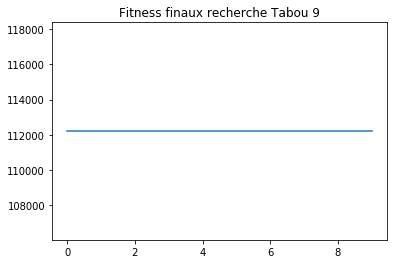

In [13]:
data = Taixxa()
data.loadFile("tai12a.dat")
tabuS = TabuSearch(data)

sols = []
machin = []
for i in range(10):
    for j in range(100):
        sol, fit = tabuS.solve(150,i)
        sols.append(sol.computeCost(data))
    machin.append(np.min(sols))
viewer = FitnessViewer(np.array(machin))
viewer.plot('Fitness finaux recherche Tabou '+str(i))
data.saveHashMap()

file hash not yet created think about saving for next time
[4, 16, 7, 22, 15, 5, 18, 2, 21, 19, 20, 8, 6, 11, 23, 0, 12, 24, 13, 1, 3, 17, 10, 9, 14]


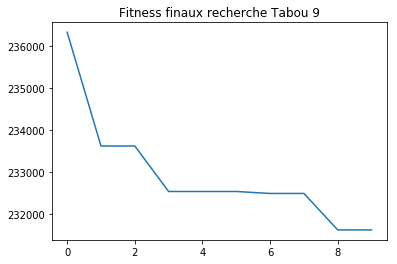

In [35]:
data = Taixxa()
data.loadFile("tai25a.dat")
sols = []
machin = []
for i in range(10):
    for j in range(100):
        sol, fit = tabuS.solve(150,i)
        sols.append(sol.computeCost(data))
    machin.append(np.min(sols))
viewer = FitnessViewer(np.array(machin))
viewer.plot('Fitness finaux recherche Tabou '+str(i))
data.saveHashMap()

[29, 11, 25, 22, 15, 6, 7, 8, 19, 16, 23, 17, 4, 12, 1, 21, 26, 27, 24, 18, 5, 3, 10, 2, 0, 20, 28, 13, 9, 14]


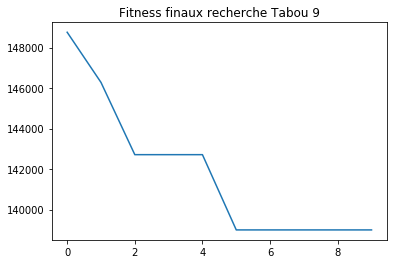

In [25]:
data = Taixxa()
data.loadFile("tai30a.dat")
sols = []
machin = []
for i in range(10):
    for j in range(100):
        sol, fit = tabuS.solve(150,i)
        sols.append(sol.computeCost(data))
    machin.append(np.min(sols))
viewer = FitnessViewer(np.array(machin))
viewer.plot('Fitness finaux recherche Tabou '+str(i))
data.saveHashMap()

file hash not yet created think about saving for next time
[30, 31, 3, 11, 22, 18, 33, 23, 2, 29, 16, 7, 10, 32, 17, 24, 4, 1, 21, 26, 9, 15, 6, 12, 25, 0, 28, 5, 19, 34, 13, 14, 20, 8, 27]


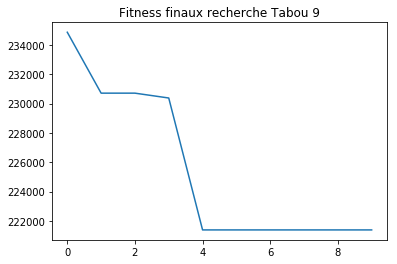

In [37]:
data = Taixxa()
data.loadFile("tai35a.dat")
sols = []
machin = []
for i in range(10):
    for j in range(100):
        sol, fit = tabuS.solve(150,i)
        sols.append(sol.computeCost(data))
    machin.append(np.min(sols))
viewer = FitnessViewer(np.array(machin))
viewer.plot('Fitness finaux recherche Tabou '+str(i))
data.saveHashMap()

file hash not yet created think about saving for next time
[11, 21, 28, 18, 27, 29, 5, 9, 12, 14, 34, 31, 0, 35, 2, 1, 6, 23, 3, 4, 10, 22, 37, 33, 25, 17, 8, 36, 32, 20, 15, 7, 39, 26, 19, 16, 13, 24, 30, 38]


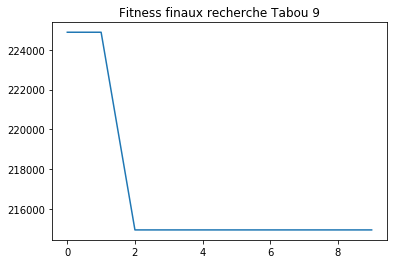

In [38]:
data = Taixxa()
data.loadFile("tai40a.dat")
sols = []
machin = []
for i in range(10):
    for j in range(100):
        sol, fit = tabuS.solve(150,i)
        sols.append(sol.computeCost(data))
    machin.append(np.min(sols))
viewer = FitnessViewer(np.array(machin))
viewer.plot('Fitness finaux recherche Tabou '+str(i))
data.saveHashMap()

file hash not yet created think about saving for next time
[16, 44, 10, 43, 26, 35, 32, 33, 11, 37, 1, 17, 40, 39, 20, 24, 9, 21, 45, 13, 22, 4, 27, 41, 18, 29, 2, 42, 31, 38, 0, 25, 23, 8, 7, 47, 36, 19, 28, 15, 14, 34, 46, 49, 48, 6, 5, 30, 3, 12]


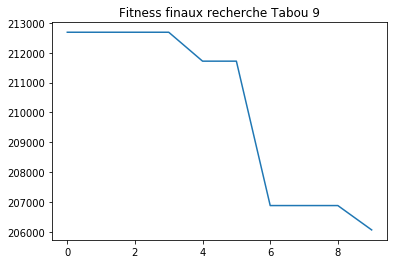

In [41]:
data = Taixxa()
data.loadFile("tai50a.dat")
sols = []
machin = []
for i in range(10):
    for j in range(100):
        sol, fit = tabuS.solve(150,i)
        sols.append(sol.computeCost(data))
    machin.append(np.min(sols))
viewer = FitnessViewer(np.array(machin))
viewer.plot('Fitness finaux recherche Tabou '+str(i))
data.saveHashMap()

file hash not yet created think about saving for next time
[53, 28, 45, 30, 25, 33, 40, 21, 51, 37, 0, 18, 13, 31, 19, 27, 5, 3, 1, 15, 57, 52, 24, 17, 2, 36, 49, 6, 32, 41, 29, 14, 56, 34, 39, 50, 9, 46, 58, 11, 22, 43, 26, 23, 7, 48, 12, 55, 59, 47, 42, 44, 54, 35, 4, 38, 10, 20, 8, 16]


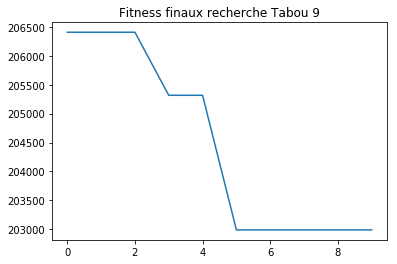

In [42]:
data = Taixxa()
data.loadFile("tai60a.dat")
sols = []
machin = []
for i in range(10):
    for j in range(100):
        sol, fit = tabuS.solve(150,i)
        sols.append(sol.computeCost(data))
    machin.append(np.min(sols))
viewer = FitnessViewer(np.array(machin))
viewer.plot('Fitness finaux recherche Tabou '+str(i))
data.saveHashMap()

[45, 35, 63, 21, 54, 47, 76, 51, 41, 46, 50, 52, 31, 74, 24, 62, 65, 5, 30, 8, 26, 18, 64, 58, 77, 43, 17, 27, 14, 55, 42, 25, 60, 48, 57, 20, 11, 0, 66, 23, 37, 15, 13, 34, 22, 12, 70, 78, 10, 19, 3, 9, 40, 16, 6, 44, 38, 29, 49, 61, 36, 71, 79, 59, 53, 56, 7, 73, 2, 69, 67, 33, 72, 68, 32, 28, 1, 75, 39, 4]


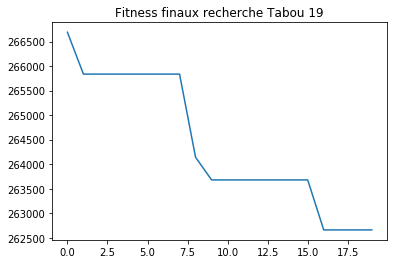

In [46]:
data = Taixxa()
data.loadFile("tai80a.dat")
sols = []
machin = []
for i in range(20):
    for j in range(10):
        sol, fit = tabuS.solve(150,i)
        sols.append(sol.computeCost(data))
    machin.append(np.min(sols))
viewer = FitnessViewer(np.array(machin))
viewer.plot('Fitness finaux recherche Tabou '+str(i))
data.saveHashMap()

[25, 87, 4, 67, 51, 50, 47, 83, 41, 29, 16, 74, 28, 64, 62, 81, 91, 76, 56, 93, 63, 38, 92, 10, 52, 11, 35, 46, 37, 39, 22, 26, 79, 55, 2, 77, 9, 84, 94, 96, 18, 32, 60, 97, 75, 49, 57, 86, 20, 36, 13, 88, 40, 44, 14, 0, 73, 68, 66, 59, 42, 89, 65, 98, 85, 31, 17, 72, 82, 15, 95, 78, 61, 69, 33, 7, 5, 1, 58, 8, 19, 43, 3, 30, 80, 23, 71, 99, 24, 6, 27, 21, 12, 45, 90, 70, 53, 54, 48, 34]


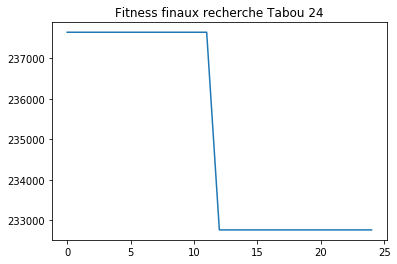

In [54]:
data = Taixxa()
data.loadFile("tai100a.dat")
sols = []
machin = []
for i in range(25):
    for j in range(10):
        sol, fit = tabuS.solve(35,i)
        sols.append(sol.computeCost(data))
    machin.append(np.min(sols))
viewer = FitnessViewer(np.array(machin))
viewer.plot('Fitness finaux recherche Tabou '+str(i))
data.saveHashMap()

In [59]:
del data

In [345]:
data = Taixxa()
data.loadFile("tai100a.dat")

[91, 54, 5, 49, 63, 7, 74, 4, 80, 29, 38, 25, 78, 48, 90, 76, 64, 50, 20, 98, 39, 11, 87, 34, 73, 12, 57, 62, 71, 45, 28, 75, 22, 40, 30, 96, 79, 81, 18, 15, 43, 6, 44, 51, 17, 14, 93, 16, 53, 67, 84, 55, 86, 66, 33, 59, 58, 37, 60, 8, 72, 26, 88, 70, 24, 47, 82, 56, 85, 99, 68, 89, 13, 77, 35, 52, 3, 36, 92, 61, 0, 46, 65, 10, 83, 27, 69, 19, 1, 21, 9, 32, 41, 97, 42, 94, 23, 2, 95, 31]


In [61]:
len(data._hashMap)

122070

In [20]:
diff = {}
tailles = [12,15,20,25,30,35,40,50,60,80,100]
for s in tailles:
    data = Taixxa()
    data.loadFile("tai"+str(s)+"a.dat")
    perm = Permutation(12)
    elapsed_time = 0.0
    elapsed_time2 = 0.0
    nbC = 0
    nbA = 0
    for i in range(100000):
        perm.shuffle()
        if perm.permhash() in data._hashMap:
            start_time = time.time()
            perm.computeCost(data)
            elapsed_time += time.time() - start_time
            nbA += 1
        else:
            start_time = time.time()
            perm.computeCost(data)
            elapsed_time2 += time.time() - start_time
            nbC += 1
    diff[s] = elapsed_time2/float(nbC)
print(diff)

[11, 6, 2, 4, 1, 10, 9, 7, 0, 3, 8, 5]
[10, 4, 12, 8, 14, 5, 1, 7, 0, 11, 2, 13, 6, 9, 3]
[5, 14, 17, 7, 9, 6, 3, 4, 1, 15, 19, 13, 12, 2, 0, 16, 11, 18, 10, 8]
[14, 15, 11, 1, 3, 5, 16, 8, 4, 10, 17, 18, 6, 24, 19, 13, 12, 2, 21, 22, 7, 23, 0, 9, 20]
[14, 12, 26, 5, 22, 25, 7, 16, 11, 28, 21, 27, 19, 2, 24, 9, 8, 13, 15, 17, 0, 10, 29, 6, 18, 1, 23, 20, 4, 3]
[33, 13, 25, 26, 2, 20, 7, 28, 29, 10, 23, 21, 11, 4, 16, 30, 5, 19, 8, 17, 24, 3, 32, 1, 34, 12, 9, 27, 15, 14, 0, 18, 6, 31, 22]
[28, 11, 0, 21, 29, 7, 33, 30, 39, 22, 35, 18, 17, 6, 15, 8, 26, 32, 38, 3, 9, 27, 10, 2, 1, 34, 19, 24, 20, 36, 5, 14, 31, 16, 25, 37, 4, 13, 23, 12]
[44, 34, 10, 1, 30, 13, 9, 42, 24, 22, 20, 19, 31, 11, 45, 47, 4, 43, 5, 21, 2, 8, 23, 33, 0, 29, 14, 7, 35, 49, 25, 40, 3, 6, 26, 46, 37, 17, 38, 36, 12, 28, 18, 27, 48, 16, 41, 39, 15, 32]
[11, 40, 20, 30, 3, 56, 37, 29, 38, 52, 8, 51, 5, 15, 44, 59, 49, 12, 35, 42, 24, 10, 48, 21, 14, 25, 46, 43, 41, 31, 55, 26, 58, 45, 53, 19, 7, 17, 28, 1, 27, 16, 

diff est le temps gagné pour un accès

In [45]:
(data._access*diff[12])

0.02326002654935245